# Clustering
***
## Set up

In [13]:
import os
import datetime
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, model_selection, metrics
import copy

from sklearn.preprocessing import OrdinalEncoder

In [14]:
local_path = 'data/clustering/'

path = local_path

# For test train files
df = pd.read_csv(path+'pokedex_(Update_05.20).csv',  index_col=0)

In [15]:
df.select_dtypes(['object']).nunique().sort_values(ascending=True).head(60)

status               4
growth_rate          6
egg_type_2          11
egg_type_1          15
type_1              18
type_2              18
ability_2          126
ability_hidden     154
ability_1          202
species            641
german_name        807
japanese_name      807
name              1028
dtype: int64

In [16]:
obs = ['egg_type_1', 'egg_type_2', 'type_2', 'ability_hidden', 'ability_1', 'ability_2', 'species', 'growth_rate']
df[obs] = df[obs].fillna('None')

In [17]:
manencode = ['status']

df[manencode] = df[manencode].replace({'Normal': 1, 'Sub Legendary': 2, 'Legendary' :3, 'Mythical': 4}, regex=True)

manencode2 = ['growth_rate']

df[manencode2] = df[manencode2].replace({'Slow': 1, 'Medium Slow': 2, 'Fluctuating': 3, 'Erratic': 4, 'Medium Fast' :5, 'Fast': 6, 'None': 0}, regex=True)



In [18]:
enc = OrdinalEncoder()
encode = ['egg_type_1', 'egg_type_2', 'type_2', 'ability_hidden', 'ability_1', 'ability_2', 'species']
df[encode] = enc.fit_transform(df[encode])

In [19]:
# Mem reduction function by converting data types. (Credit to Guillaume Martin and Arjan Groen)
# I would like to make this check floats better and extend to catagory for objects that fit, and bools.

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if (c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max):
                    df[col] = df[col].astype(np.float16)
                elif (c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)   
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return

reduce_mem_usage(df)

Mem. usage decreased to  0.12 Mb (69.1% reduction)


In [20]:
# Dropping

dropped = ['german_name', 'japanese_name']
df = df.drop(dropped, axis=1)

In [21]:
df = df.select_dtypes(exclude=['object'])

In [22]:
df = df.fillna(0)

In [23]:
df.columns

Index(['pokedex_number', 'generation', 'status', 'species', 'type_number',
       'type_2', 'height_m', 'weight_kg', 'abilities_number', 'ability_1',
       'ability_2', 'ability_hidden', 'total_points', 'hp', 'attack',
       'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate',
       'base_friendship', 'base_experience', 'growth_rate', 'egg_type_number',
       'egg_type_1', 'egg_type_2', 'percentage_male', 'egg_cycles',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'],
      dtype='object')

In [24]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=6, random_state=0)
y_kmeans = kmeans.fit(df)
kmeans.labels_

#kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

array([[6.40000000e+02, 5.43589783e+00, 2.53846169e+00, 3.27179474e+02,
        1.71794868e+00, 9.41025639e+00, 4.76906443e+00, 5.75948730e+02,
        1.28205121e+00, 9.56410217e+01, 5.48461533e+01, 8.04358978e+01,
        6.45025635e+02, 1.08564102e+02, 1.28692307e+02, 1.17923080e+02,
        1.09435898e+02, 9.90000000e+01, 8.14102554e+01, 1.20769272e+01,
        1.23076935e+01, 2.42512817e+02, 1.41025639e+00, 1.05128205e+00,
        1.12564106e+01, 7.92307711e+00, 5.12820816e+00, 1.00641022e+02,
        7.50000000e-01, 1.02564096e+00, 9.42307651e-01, 7.62820482e-01,
        8.07692289e-01, 1.22435904e+00, 1.25641024e+00, 5.89743614e-01,
        1.41025639e+00, 9.03846145e-01, 8.01282048e-01, 9.10256326e-01,
        9.35897410e-01, 1.17948723e+00, 1.17948723e+00, 1.15384614e+00,
        9.42307651e-01, 1.26282048e+00],
       [2.89005615e+02, 2.65193272e+00, 1.29281783e+00, 2.15740433e+02,
        1.59668493e+00, 1.00662985e+01, 1.82042968e+00, 1.04928780e+02,
        2.00000024e+00,

In [25]:
# plot the 3 clusters
plt.scatter(
    X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

NameError: name 'X' is not defined

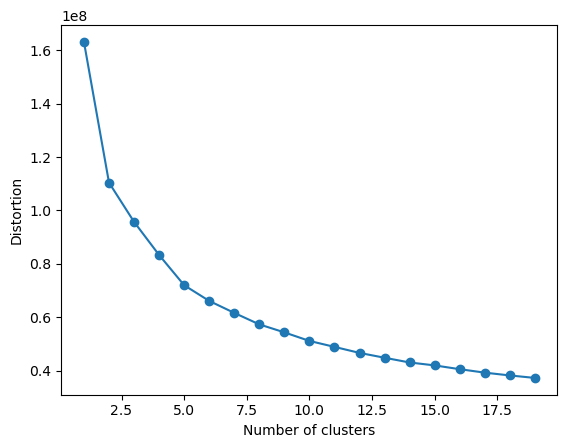

In [26]:
max_clusters = 20


distortions = []
for i in range(1, max_clusters):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, max_clusters), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

<AxesSubplot:xlabel='attack', ylabel='weight_kg'>

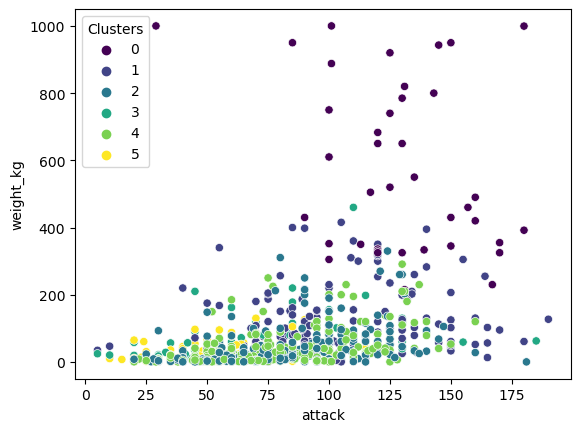

In [27]:
df['Clusters'] = kmeans.labels_
sns.scatterplot(x="attack", y="weight_kg",hue = 'Clusters',  data=df,palette='viridis')


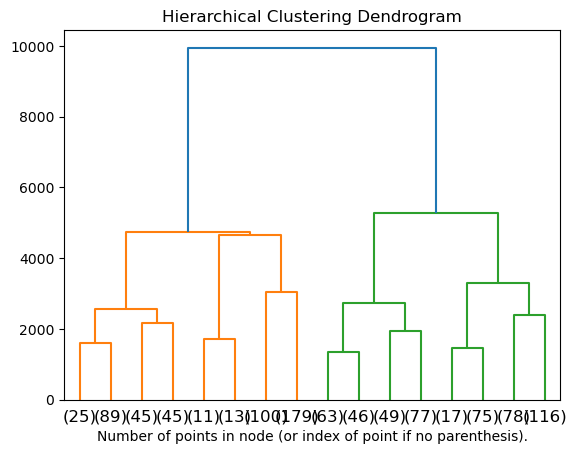

In [28]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


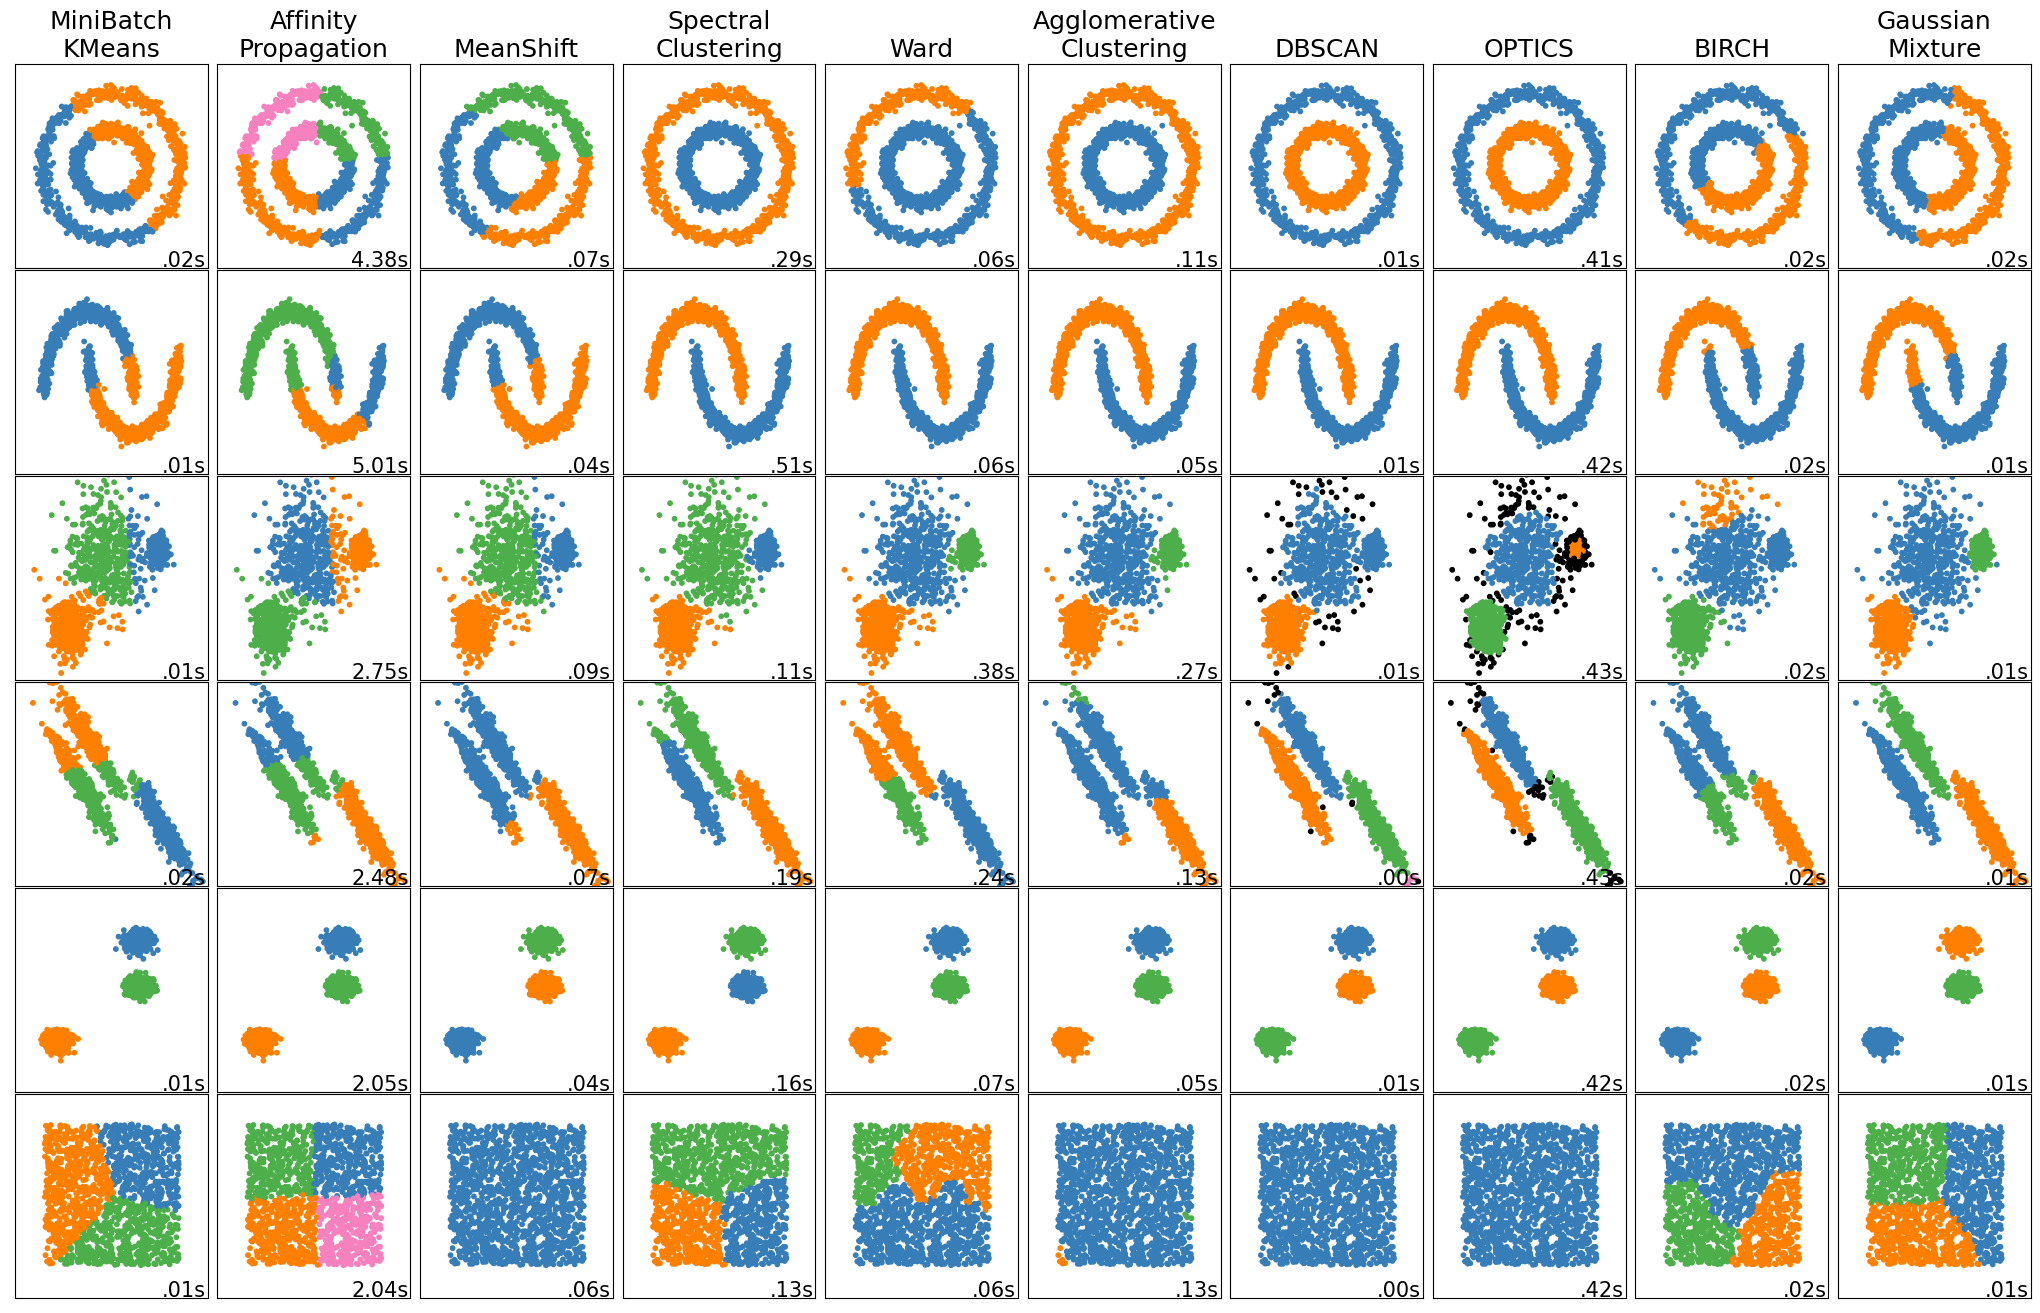

In [29]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.28831428
For n_clusters = 3 The average silhouette_score is : 0.22496216
For n_clusters = 4 The average silhouette_score is : 0.2390996
For n_clusters = 5 The average silhouette_score is : 0.21989228
For n_clusters = 6 The average silhouette_score is : 0.20968957
For n_clusters = 7 The average silhouette_score is : 0.20297495
For n_clusters = 8 The average silhouette_score is : 0.19534715
For n_clusters = 9 The average silhouette_score is : 0.20084096
For n_clusters = 10 The average silhouette_score is : 0.19732274
For n_clusters = 20 The average silhouette_score is : 0.18698767
For n_clusters = 40 The average silhouette_score is : 0.17587708
For n_clusters = 80 The average silhouette_score is : 0.15580952


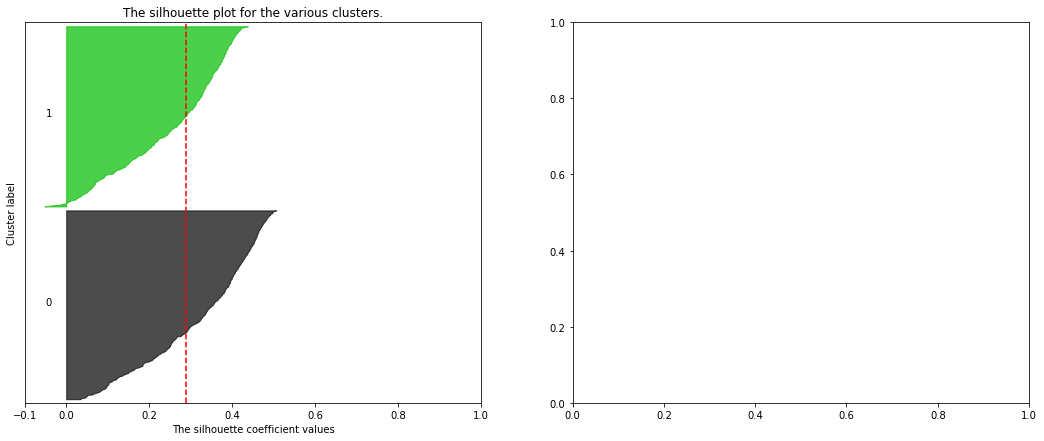

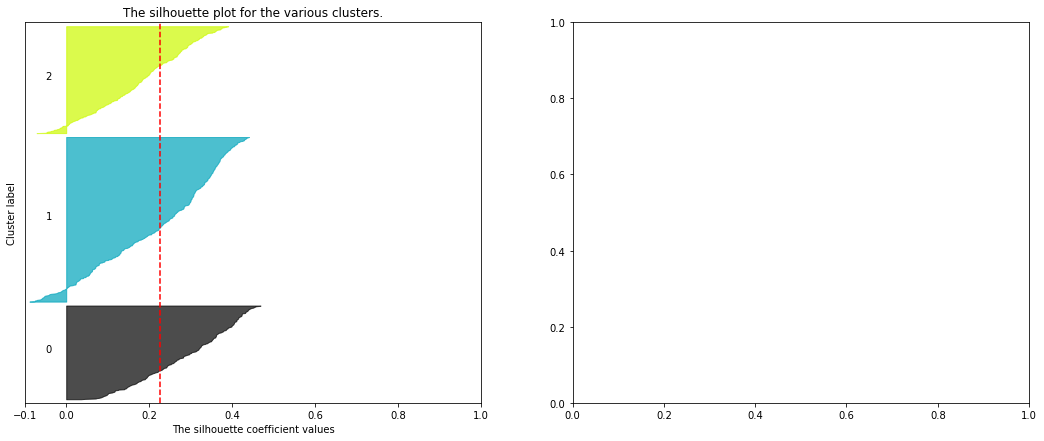

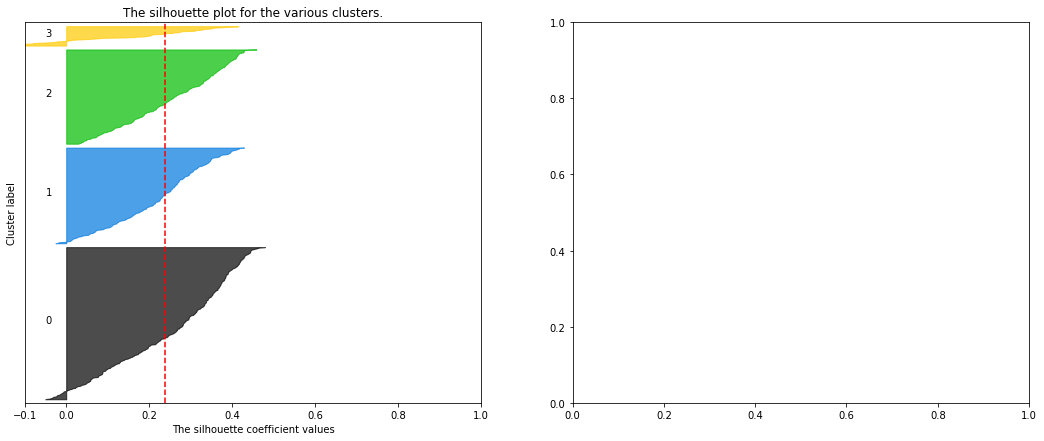

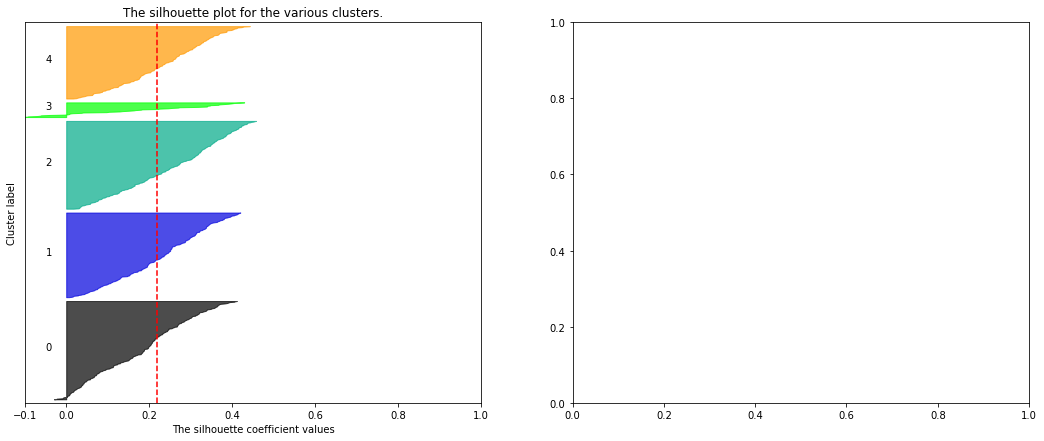

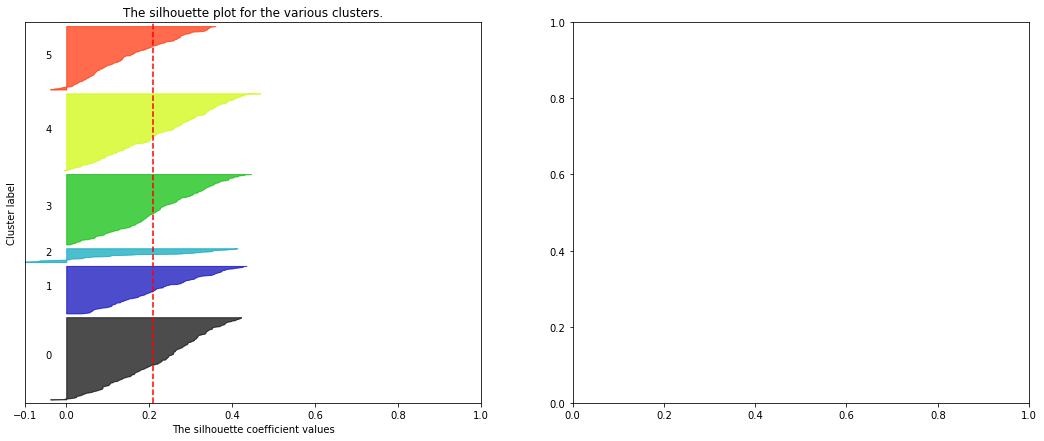

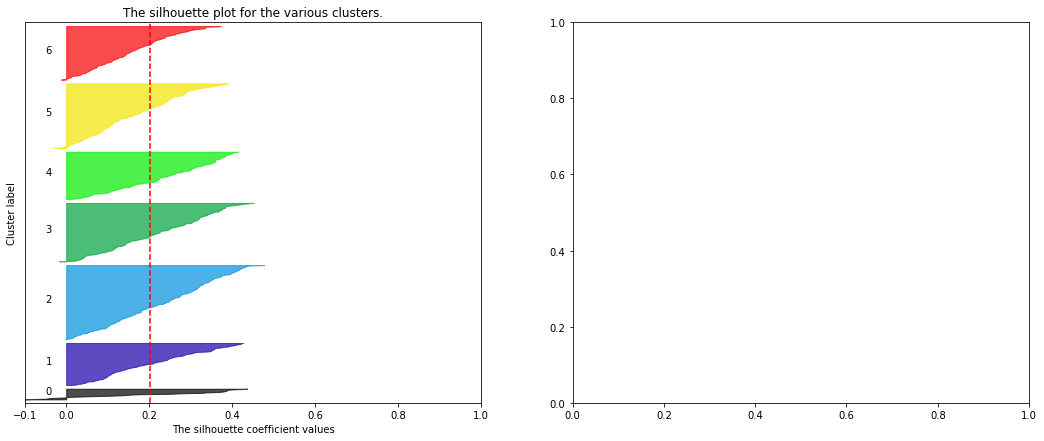

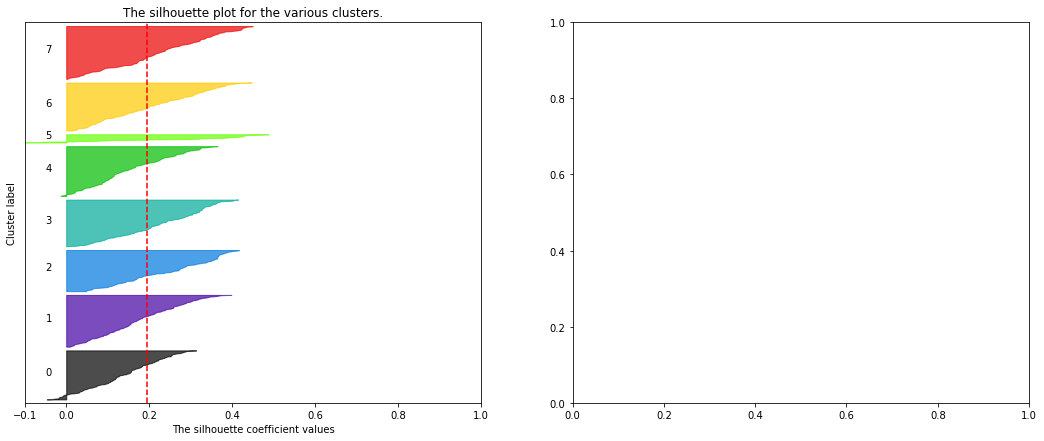

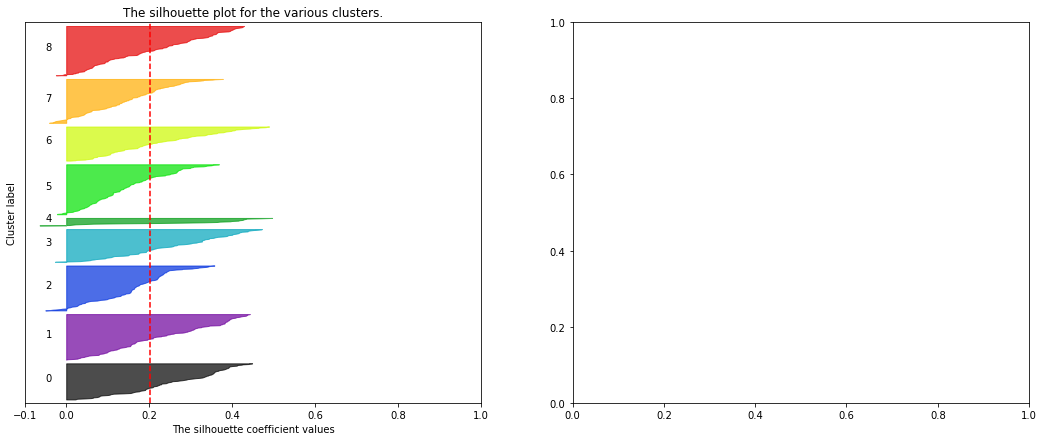

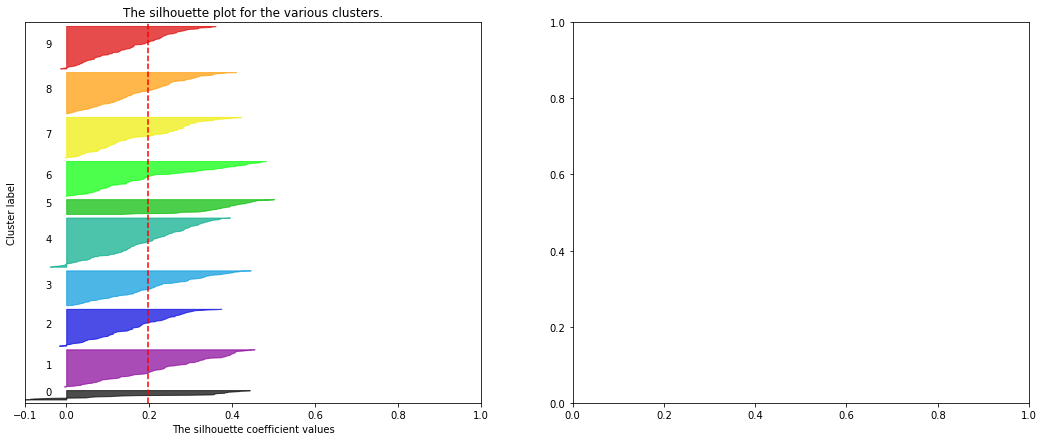

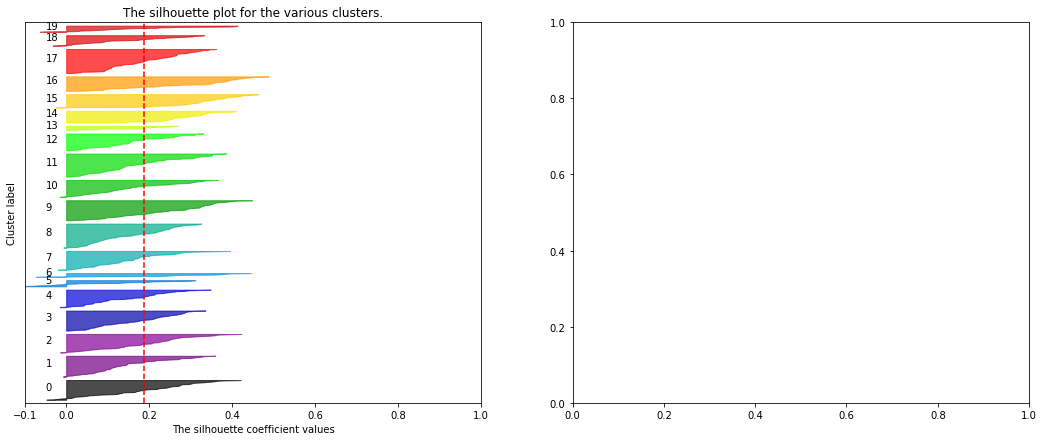

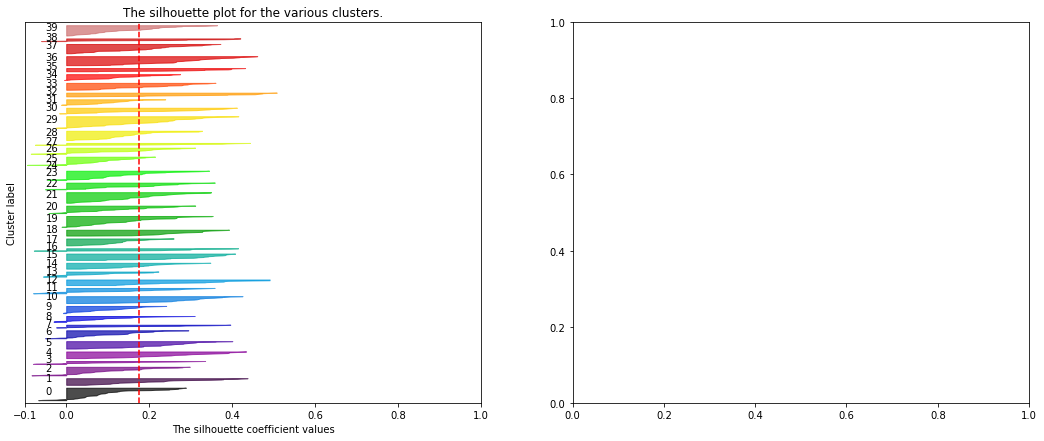

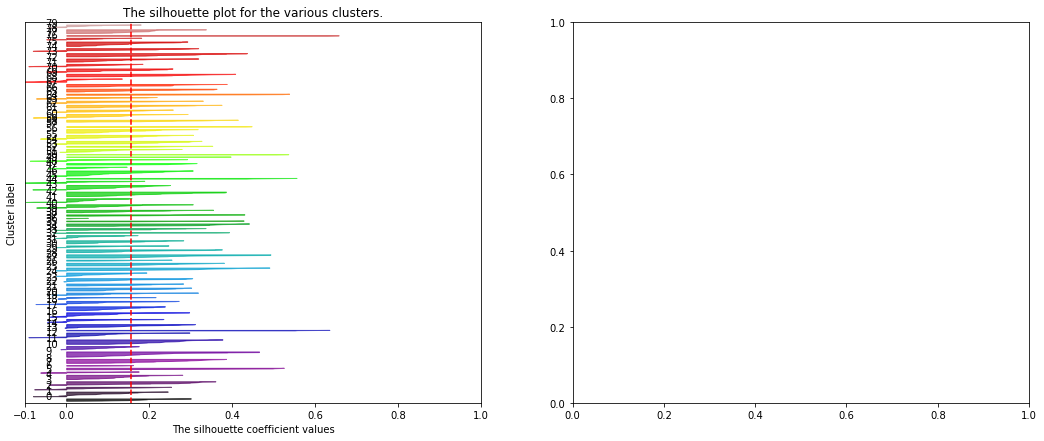

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20]

X = df

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    #colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(
    #    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    #)

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    #ax2.scatter(
    #    centers[:, 0],
    #    centers[:, 1],
    #    marker="o",
    #    c="white",
    #    alpha=1,
    #    s=200,
    #    edgecolor="k",
    #)

   # for i, c in enumerate(centers):
   #     ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

   # ax2.set_title("The visualization of the clustered data.")
   # ax2.set_xlabel("Feature space for the 1st feature")
   # ax2.set_ylabel("Feature space for the 2nd feature")

   # plt.suptitle(
   #     "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
   #     % n_clusters,
   #     fontsize=14,
   #     fontweight="bold",
   # )

plt.show()